# Tutorial 00: Dataset Overview

## Introduction

🎉Welcome to the LadybirdMNIST dataset tutorial!🎉  

This notebook provides a comprehensive overview of the LadybirdMNIST datset, which contains 70,000 synthetic ladybird pattern images generated through reaction-diffusion (RD) processes. Each image is paired with PDE parameters used for its generation, making this datset unique for physics-informed machine learning reserach.   

### Key Features of LadybirdMNIST

- **70,000 synthetic ladybird data entities** across 10 distinct morphological classes
- **Physics-informed dataset** with explicit PDE parameter information
- **Multiple data configurations** for different research applications
- **Standardized benchmark foramt** following MNIST conventions

### Dataset Structure

The dataset is organized into 10 classes based on morphological characteristics:

**Spot-based patterns:**
- `axyridis`: Red spots on black background
- `paucipuncta`: 1-9 black spots on red background  
- `succinea`: 10-19 black spots on red background
- `cheetah`: 20+ black spots on red background
- `gridspots`: Regular arrangement of spots

**Line-based patterns:**
- `lineopuncta`: Linear and spotted elements
- `transfasciata`: Horizontal stripes
- `longifasciata`: Vertical lines
- `curvifasciata`: Curved lines and complex geometries
- `moko`: Intricate geometric patterns with fine linear structures

### Avaliable Data Configurations

| Configuration | Description | Features | Use Case |
|---------------|-------------|----------|----------|
| `morph-28` | 28×28 grayscale morphological images | id, label, image | Traditional ML approaches |
| `morph-128` | 128×128 RGB morphological images | id, label, image | Modern deep learning |
| `pattern-28` | 28×28 grayscale pattern images | id, label, image | Pattern analysis |
| `pattern-128` | 128×128 RGB pattern images | id, label, image | High-resolution analysis |
| `states` | Reaction-diffusion solver states | id, label, states_u, states_v | Physics-informed learning |
| `models` | PDE model parameters | id, label, model_json | Parameter estimation |

⚠️ **Note**: The `states` configuration contains large PDE solver data and should be downloaded with caution.

## 1. Loading the Dataset
Let's start by loading different configurations of the LadybirdMNIST dataset using the Hugging Face datasets library.

In [2]:
# Import required libraries
from datasets import load_dataset
from PIL import Image
from torchvision import transforms

import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the morph-28 dataset (28x28 grayscale morphological images)
print("Loading morph-28 dataset...")
morph_28_ds = load_dataset("cxinsys/ladybirdmnist", 'morph-28')
print(f"Dataset structure: {morph_28_ds}")

# Display first sample information
first_sample = morph_28_ds['train'][0]
print(f"\nFirst sample:")
print(f"  ID: {first_sample['id']}")
print(f"  Label : {first_sample['label']}")
print(f"  Image type: {type(first_sample['image'])}")
print(f"  Image size: {first_sample['image'].size}")

Loading morph-28 dataset...
Dataset structure: DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'image'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['id', 'label', 'image'],
        num_rows: 10000
    })
})

First sample:
  ID: 1483518086234970557
  Label : 3
  Image type: <class 'PIL.PngImagePlugin.PngImageFile'>
  Image size: (28, 28)


In [5]:
# Load the morph-128 dataset (128x128 RGB morphological images)
print("Loading morph-128 dataset...")
morph_128_ds = load_dataset("cxinsys/ladybirdmnist", 'morph-128')
print(f"Dataset structure: {morph_128_ds}")

# Display first sample information
first_sample = morph_128_ds['train'][0]
print(f"\nFirst sample:")
print(f"  ID: {first_sample['id']}")
print(f"  Label : {first_sample['label']}")
print(f"  Image type: {type(first_sample['image'])}")
print(f"  Image size: {first_sample['image'].size}")

Loading morph-128 dataset...
Dataset structure: DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'image'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['id', 'label', 'image'],
        num_rows: 10000
    })
})

First sample:
  ID: 1483518086234970557
  Label : 3
  Image type: <class 'PIL.PngImagePlugin.PngImageFile'>
  Image size: (128, 128)


In [29]:
# Load the pattern-28 dataset (28x28 grayscale pattern images)
print("Loading pattern-28 dataset...")
pattern_28_ds = load_dataset("cxinsys/ladybirdmnist", 'pattern-28')
print(f"Dataset structure: {pattern_28_ds}")

# Display first sample information
first_sample = pattern_28_ds['train'][0]
print(f"\nFirst sample:")
print(f"  ID: {first_sample['id']}")
print(f"  Label : {first_sample['label']}")
print(f"  Image type: {type(first_sample['image'])}")
print(f"  Image size: {first_sample['image'].size}")

Loading pattern-28 dataset...


Generating train split: 60000 examples [00:00, 217969.34 examples/s]
Generating test split: 10000 examples [00:00, 183182.98 examples/s]

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'image'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['id', 'label', 'image'],
        num_rows: 10000
    })
})

First sample:
  ID: 1483518086234970557
  Label : 3
  Image type: <class 'PIL.PngImagePlugin.PngImageFile'>
  Image size: (28, 28)


In [30]:
# Load the pattern-128 dataset (128x128 RGB pattern images)
print("Loading pattern-128 dataset...")
pattern_128_ds = load_dataset("cxinsys/ladybirdmnist", 'pattern-128')
print(f"Dataset structure: {pattern_128_ds}")

# Display first sample information
first_sample = pattern_128_ds['train'][0]
print(f"\nFirst sample:")
print(f"  ID: {first_sample['id']}")
print(f"  Label : {first_sample['label']}")
print(f"  Image type: {type(first_sample['image'])}")
print(f"  Image size: {first_sample['image'].size}")

Loading pattern-128 dataset...


Generating train split: 60000 examples [00:00, 162157.72 examples/s]
Generating test split: 10000 examples [00:00, 184220.87 examples/s]

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'image'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['id', 'label', 'image'],
        num_rows: 10000
    })
})

First sample:
  ID: 1483518086234970557
  Label : 3
  Image type: <class 'PIL.PngImagePlugin.PngImageFile'>
  Image size: (128, 128)


## 2. Dataset Visualization
Let's visualize samples from different classes to understand the morphological diversity in the dataset. 

In [26]:
# Define class names for better visualization
class_names = ['axyridis', 'paucipuncta', 'succinea', 'cheetah', 'gridspots', 'lineopuncta', 'transfasciata', 'longifasciata', 'curvifasciata', 'moko']

def visualize_samples(ds, num_samples=3, figsize=(16,7)):
    fig, axes = plt.subplots(num_samples, 10, figsize=figsize)
    fig.suptitle("LadybirdMNIST Datset Samples by Class", fontsize=16)

    for class_idx in range(10):
        # Get samples for this class
        class_samples = ds['test'].filter(lambda x: x['label'] == class_idx, num_proc=4)

        for sample_idx in range(num_samples):
            sample = class_samples[sample_idx]
            img = sample['image']

            ax = axes[sample_idx, class_idx]
            ax.imshow(img, cmap='gray' if img.mode == 'L' else None)
            ax.set_title(f'{class_names[class_idx]} \n (ID: {sample["id"]})', fontsize=6)
            ax.axis('off')

    plt.tight_layout()
    plt.show()

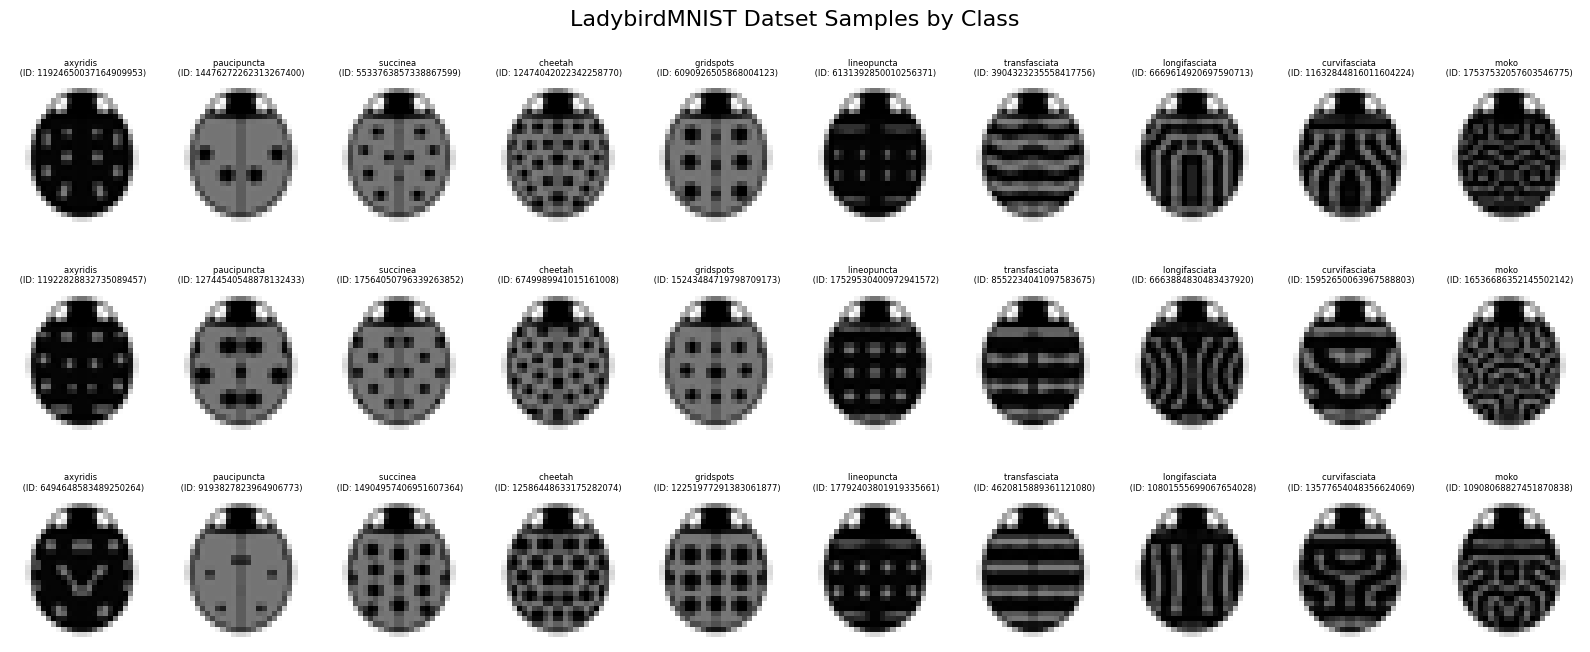

In [27]:
# Visualize morph-128 dataset
visualize_samples(morph_28_ds)

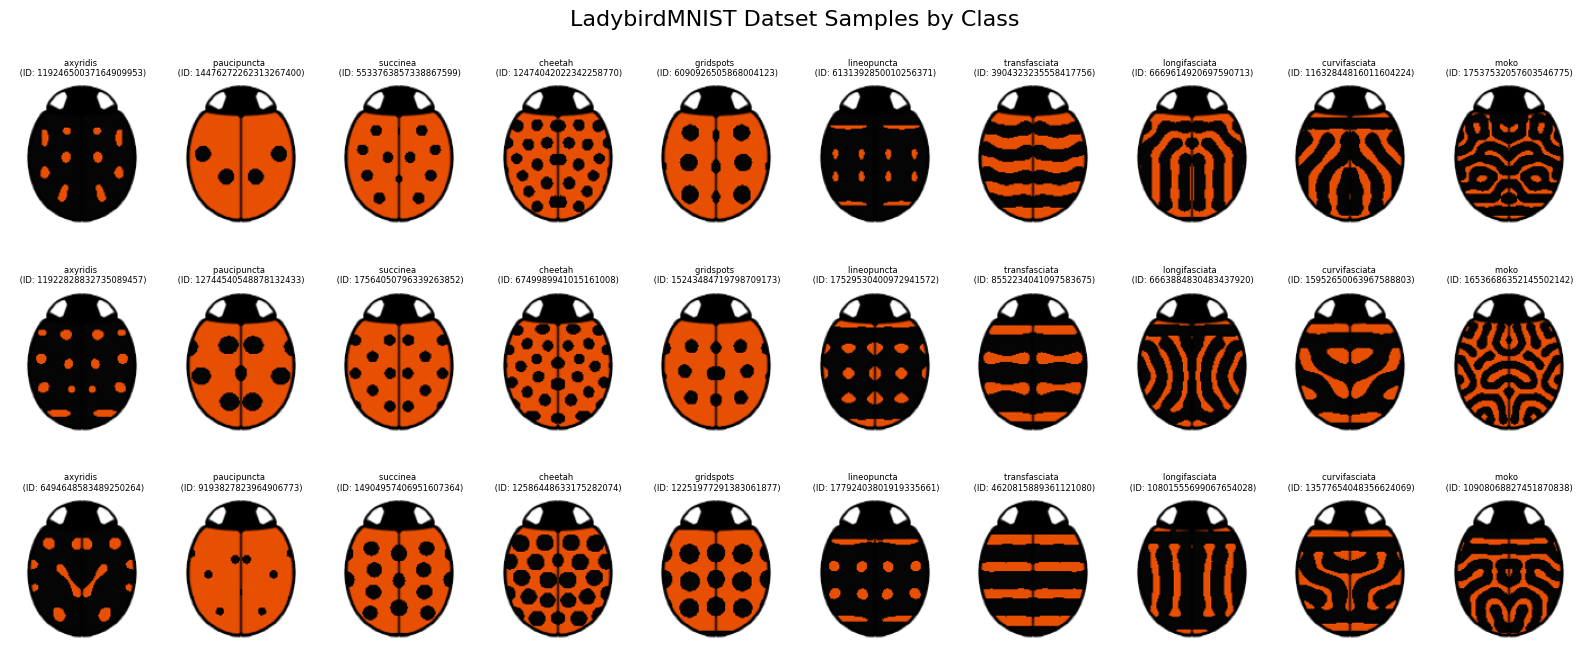

In [28]:
# Visualize morph-128 dataset
visualize_samples(morph_128_ds)

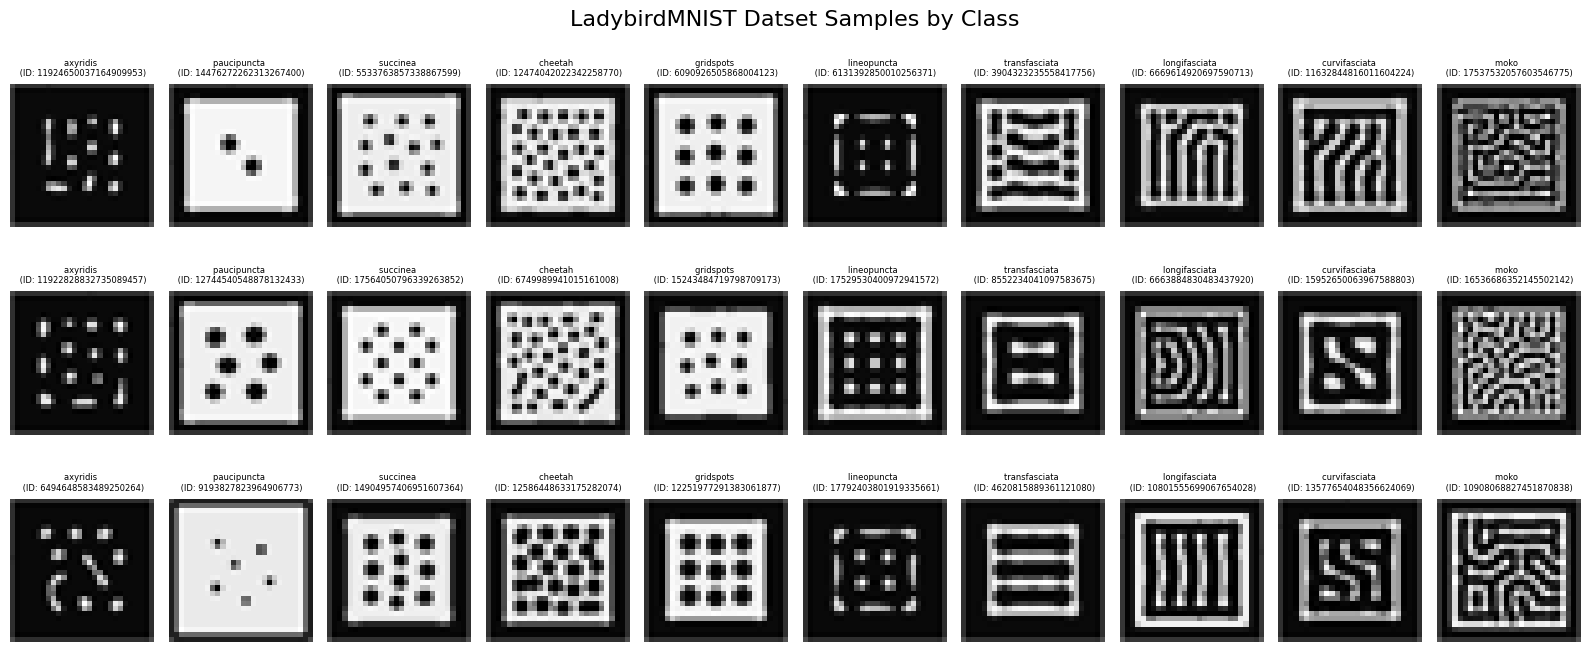

In [32]:
# Visualize pattern-28 dataset
visualize_samples(pattern_28_ds)

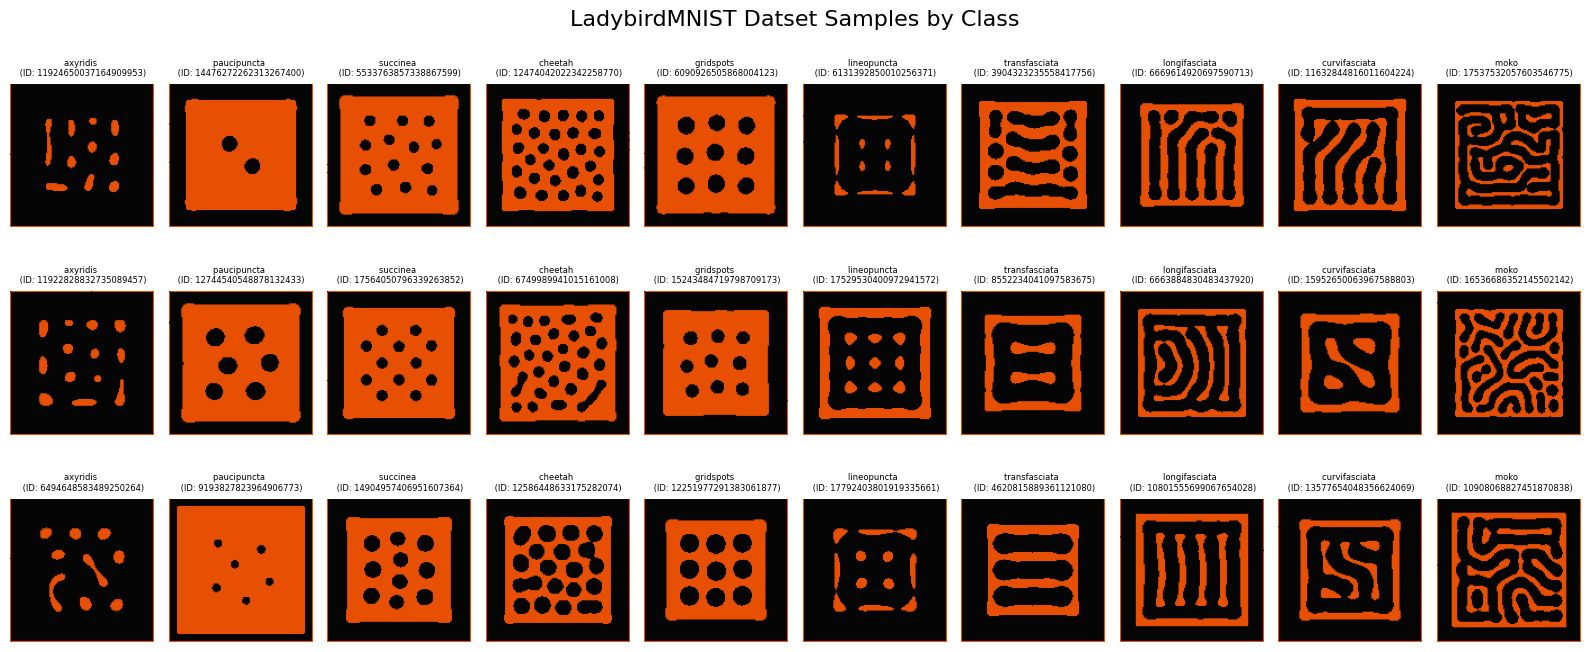

In [34]:
# Visualize pattern-128 dataset
visualize_samples(pattern_128_ds)

In [54]:
# Visualize morph and pattern
def compare_morph_pattern(morph_ds, pattern_ds, num_samples=10):
    fig, axes = plt.subplots(2, num_samples, figsize=(1 * num_samples, 3))
    fig.suptitle("Morphological and Pattern Comparision", fontsize=16)
    n_list = [2000, 1000, 6000, 0, 8000, 4000, 9000, 7000, 5000, 3000]
    for i in range(num_samples):
        morph_sample = morph_ds['test'][n_list[i]]
        pattern_sample = pattern_ds['test'][n_list[i]]

        # Morphological image
        axes[0, i].imshow(morph_sample['image'], cmap='gray' if morph_sample['image'].mode == 'L' else None)
        axes[0, i].set_title(f'Morphological \n ({class_names[morph_sample["label"]]})', fontsize=6)
        axes[0, i].axis('off')

        # Pattern image
        axes[1, i].imshow(pattern_sample['image'], cmap='gray' if pattern_sample['image'].mode == 'L' else None)
        axes[1, i].set_title(f'Pattern \n ({class_names[pattern_sample["label"]]})', fontsize=6)
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

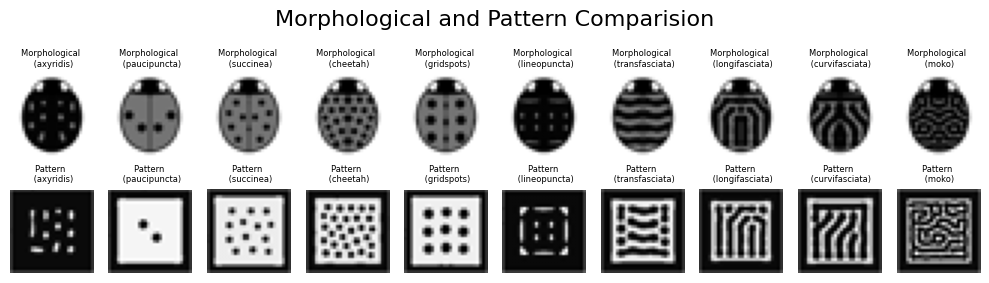

In [55]:
# Compare morph-28 and pattern-28
compare_morph_pattern(morph_28_ds, pattern_28_ds)

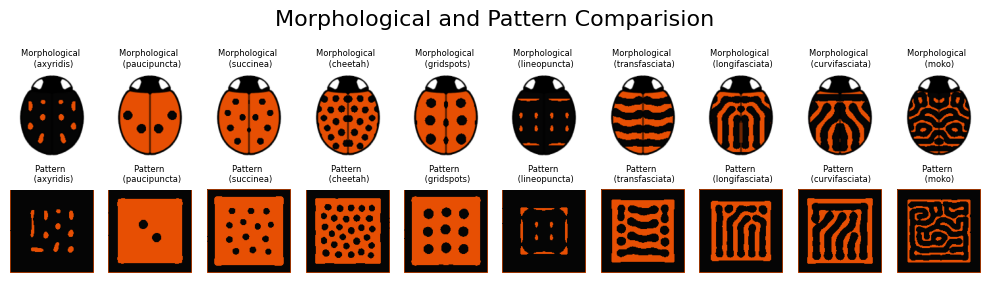

In [56]:
# Compare morph-128 and pattern-128
compare_morph_pattern(morph_128_ds, pattern_128_ds)

## 3. PyTorch DataLoader Integration

Now let's create PyTorch datsets and dataloaders for training machine learning models.

In [64]:
from torch.utils.data import Dataset, DataLoader

class LadybirdMNISTDataset(Dataset):
    """
    Pytorch Dataset class for LadybirdMNIST.

    Args:
    config (str): The name of the dataset configuration to load ('morph-28', 'pattern-28', etc.)
    split (str, optional): The split to load ('train', 'test'). Defaults to 'train'.
    transform (callable, optional): A function/transform that takes in an image and returns a transformed version.
    """
    def __init__(self, config, split='train', transform=None):
        self.dataset = load_dataset("cxinsys/ladybirdmnist", config, split=split)
        self.transform = transform

        if self.transform is None:
            self.transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        image = sample['image']

        if self.transform:
            image = self.transform(image)

        return {
            'id': sample['id'],
            'image': image
        }, sample['label']
        

In [60]:
# Create datasets
print("Creating PyTorch datasets...")
morph_28_train = LadybirdMNISTDataset('morph-28', 'train')
morph_28_test = LadybirdMNISTDataset('morph-28', 'test')
morph_128_train = LadybirdMNISTDataset('morph-128', 'train')

print(f"Morph-28 train samples: {len(morph_28_train)}")
print(f"Morph-28 test samples: {len(morph_28_test)}")
print(f"Morph-128 train samples: {len(morph_128_train)}")


Creating PyTorch datasets...
Morph-28 train samples: 60000
Morph-28 test samples: 10000
Morph-128 train samples: 60000


In [63]:
# Create dataloaders
print("Creating PyTorch dataloaders...")

# Morph-28 dataloaders
morph_28_train_loader = DataLoader(
    morph_28_train,
    batch_size=16,
    shuffle=True,
    num_workers=2
)

# Morph-28 test dataloader  
morph_28_test_loader = DataLoader(
    morph_28_test,
    batch_size=16,
    shuffle=False,
    num_workers=2
)

# Morph-128 dataloaders
morph_128_train_loader = DataLoader(
    morph_128_train,
    batch_size=8, 
    shuffle=True,
    num_workers=2
)

print("Dataloaders created successfully!")

# Test the dataloaders
print("\nTesting the dataloaders...")
for data, label in morph_28_train_loader:
    print(f"Batch size: {data['image'].size(0)}")
    print(f"Image shape: {data['image'].shape}")
    print(f"Label shape: {label.shape}")
    print(f"Sample IDs: {data['id'][:5]}")
    print(f"Sample labels: {label[:5].tolist()}")
    break



Creating PyTorch dataloaders...
Dataloaders created successfully!

Testing the dataloaders...
Batch size: 16
Image shape: torch.Size([16, 1, 28, 28])
Label shape: torch.Size([16])
Sample IDs: ['15179655365540691676', '17980728537565273702', '15042465496221579620', '14367496461760916156', '2548025624442326796']
Sample labels: [5, 7, 0, 7, 5]


## 4. Multi-Configuration Dataet

Let's create a dataset class that can load multiple configurations simultaneously, which is useful for multi-modal learning or comparison studies.

In [71]:
class LadybirdMNISTMulti(Dataset):
    """
    Pytorch Dataset class that loads multiple LadybirdMNIST configurations.

    Args:
    configs (list): List of dataset configurations to load ('morph-28', 'pattern-28', etc.)
    split (str, optional): The split to load ('train', 'test'). Defaults to 'train'.
    transform (callable, optional): A function/transform that takes in an image and returns a transformed version.
    """
    def __init__(self, configs, split='train', transform=None):
        self.configs = configs
        self.split = split
        self.datasets = {}
        self.transforms = {}

        for config in self.configs:
            self.datasets[config] = load_dataset("cxinsys/ladybirdmnist", config, split=split)

        if transform is None:
            for config in self.configs:
                if config in ['morph-28', 'pattern-28', 'morph-128', 'pattern-128']:
                    self.transforms[config] = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.5,), (0.5,))
                    ])
                else:
                    self.transforms[config] = None

    def __len__(self):
        return len(self.datasets[self.configs[0]])
    
    def __getitem__(self, idx):
        result = {}
        label = None
        for config in self.configs:
            sample = self.datasets[config][idx]
            image = sample['image']
            
            if config in self.transforms:
                image = self.transforms[config](image)

            result[config] = image

            if config == self.configs[0]:
                result['id'] = sample['id']
                label = torch.tensor(sample['label'], dtype=torch.int64)

        return result, label

In [73]:
# Create multi-configuration dataset
print("Creating multi-configuration dataset...")
multi_config_dataset = LadybirdMNISTMulti(
    configs=['morph-28', 'pattern-28', 'morph-128', 'pattern-128']
)

multi_config_loader = DataLoader(
    multi_config_dataset,
    batch_size=8,
    shuffle=True,
    num_workers=2
)

print(f"Multi-configuration dataset size: {len(multi_config_dataset)}")

# Test multi-config dataloader
print("\nTesting multi-config dataloader...")
for batch_idx, batch in enumerate(multi_config_loader):
    print(f"Batch {batch_idx + 1}:")
    data, label = batch
    print(f"  Batch size: {data['morph-28'].shape}")
    print(f"  Batch size: {data['pattern-28'].shape}")
    print(f"  Batch size: {data['morph-128'].shape}")
    print(f"  Batch size: {data['pattern-128'].shape}")
    print(f"  Label shape: {label.shape}")
    break

Creating multi-configuration dataset...
Multi-configuration dataset size: 60000

Testing multi-config dataloader...
Batch 1:
  Batch size: torch.Size([8, 1, 28, 28])
  Batch size: torch.Size([8, 1, 28, 28])
  Batch size: torch.Size([8, 3, 128, 128])
  Batch size: torch.Size([8, 3, 128, 128])
  Label shape: torch.Size([8])


## 5. Next Steps

This tutorial has covered the basic of loading and using the LadybirdMNIST dataset.   
Here are some suggested next steps:

1. **Classification Tutorial**: Learn how to train classification models on LadybirdMNIST
2. **Generation Tutorial**: Explore generative models for creating synthetic ladybird patterns
3. **Physics-Informed Learning**: Use PDE parameters for advanced machine learning tasks
4. **LPF framework based parameter solving**: 

The LadybirdMNIST dataset provides a unique opportunity to explore the intersection of machine learning and mathematical biology, enabling research in physics-informed deep learning and biological pattern formation.